In [24]:
%%capture
%load_ext autoreload
%autoreload 2
from setup_nb_env import *

DATA_DIR = '/work/users/k/4/k4thryn/Repos/OLD_EpSampling_Nov2024/data/'
DT = datetime.today().strftime('%Y%m%d-%H%M%S')

### <font color=blue> Transform target (and target-affecting) variables.

In [25]:
ts = '20241108-123515'

fpath = os.path.join(DATA_DIR,'processed',f'training_target_df_{ts}.csv')
df = pd.read_csv(fpath)
# drop nans
df.dropna(inplace=True)
fpath = os.path.join(DATA_DIR,'processed',f'training_acs_df_{ts}.csv')
df_acs = pd.read_csv(fpath)
df_acs.set_index('Fips',inplace=True,drop=True)
# standardize
df_acs = (df_acs-df_acs.mean()) / df_acs.std()

## TRANSFORM
county_transform = [x for x in df.columns if x.startswith('True_county_inc_deaths')]
county_transform += ['Naive_proj_deaths','Naive_true_deaths']
for var in county_transform:
    df[f'{var}_x'] = df.apply(lambda x: (x[var]) / x.Pop * 100000 , axis=1)
    
state_transform = ['Proj_state_inc_deaths','True_state_inc_deaths']
for var in state_transform:
    df[f'{var}_x'] = df.apply(lambda x: (x[var]) / x.State_pop * 100000, axis=1)
    
display(df)
print(df.columns)
# add in census features
df = df.merge(df_acs,on='Fips')

,Date,State_fips,Fips,Pop,State_pop,Ratio,Proj_state_inc_deaths,True_state_inc_deaths,True_county_cum_deaths,True_county_inc_deaths,...,True_county_inc_deaths_tm_6_x,True_county_inc_deaths_tm_7_x,True_county_inc_deaths_tm_8_x,True_county_inc_deaths_tm_9_x,True_county_inc_deaths_tm_10_x,True_county_inc_deaths_tm_11_x,Naive_proj_deaths_x,Naive_true_deaths_x,Proj_state_inc_deaths_x,True_state_inc_deaths_x
11,20200905,37,37001,169185,10367022,0.02,157.00,205.00,46.00,0.00,...,0.59,1.18,0.00,0.59,0.59,1.77,1.51,1.98,1.51,1.98
12,20200912,37,37001,169185,10367022,0.02,176.00,160.00,48.00,2.00,...,0.59,0.59,1.18,0.00,0.59,0.59,1.70,1.54,1.70,1.54
13,20200919,37,37001,169185,10367022,0.02,157.00,187.00,48.00,0.00,...,0.00,0.59,0.59,1.18,0.00,0.59,1.51,1.80,1.51,1.80
14,20200926,37,37001,169185,10367022,0.02,171.00,198.00,54.00,6.00,...,0.59,0.00,0.59,0.59,1.18,0.00,1.65,1.91,1.65,1.91
15,20201003,37,37001,169185,10367022,0.02,171.00,189.00,56.00,2.00,...,1.18,0.59,0.00,0.59,0.59,1.18,1.65,1.82,1.65,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,20220409,37,37199,18357,10367022,0.00,55.00,43.00,51.00,0.00,...,0.00,5.45,5.45,16.34,5.45,32.69,0.53,0.41,0.53,0.41
9896,20220416,37,37199,18357,10367022,0.00,41.00,76.00,51.00,0.00,...,5.45,0.00,5.45,5.45,16.34,5.45,0.40,0.73,0.40,0.73
9897,20220423,37,37199,18357,10367022,0.00,60.00,29.00,51.00,0.00,...,0.00,5.45,0.00,5.45,5.45,16.34,0.58,0.28,0.58,0.28
9898,20220430,37,37199,18357,10367022,0.00,33.00,42.00,51.00,0.00,...,0.00,0.00,5.45,0.00,5.45,5.45,0.32,0.41,0.32,0.41


Index(['Date', 'State_fips', 'Fips', 'Pop', 'State_pop', 'Ratio',
       'Proj_state_inc_deaths', 'True_state_inc_deaths',
       'True_county_cum_deaths', 'True_county_inc_deaths', 'Naive_proj_deaths',
       'Naive_true_deaths', 'True_county_inc_deaths_tm_4',
       'True_county_inc_deaths_tm_5', 'True_county_inc_deaths_tm_6',
       'True_county_inc_deaths_tm_7', 'True_county_inc_deaths_tm_8',
       'True_county_inc_deaths_tm_9', 'True_county_inc_deaths_tm_10',
       'True_county_inc_deaths_tm_11', 'True_county_inc_deaths_x',
       'True_county_inc_deaths_tm_4_x', 'True_county_inc_deaths_tm_5_x',
       'True_county_inc_deaths_tm_6_x', 'True_county_inc_deaths_tm_7_x',
       'True_county_inc_deaths_tm_8_x', 'True_county_inc_deaths_tm_9_x',
       'True_county_inc_deaths_tm_10_x', 'True_county_inc_deaths_tm_11_x',
       'Naive_proj_deaths_x', 'Naive_true_deaths_x', 'Proj_state_inc_deaths_x',
       'True_state_inc_deaths_x'],
      dtype='object')


### <font color=blue> Target variable exploration.

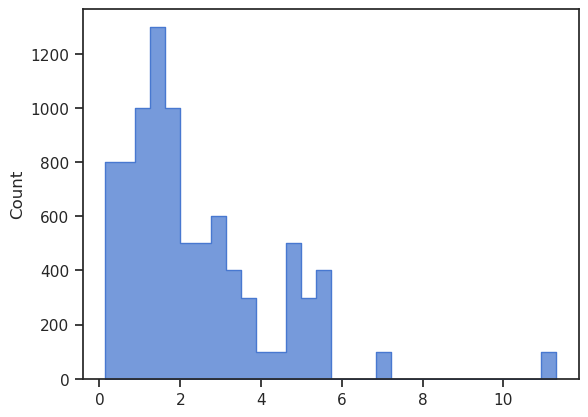

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1, style='ticks', palette='muted') 

sns.histplot(df.True_state_inc_deaths_x.values, bins=30, kde=False, element='step')
# sns.kdeplot(df.True_state_inc_deaths_x.values)
plt.show()

In [27]:
df.True_state_inc_deaths_x.describe()

count   8800.00
mean       2.40
std        1.84
min        0.14
25%        1.13
50%        1.88
75%        3.39
max       11.31
Name: True_state_inc_deaths_x, dtype: float64

In [28]:
from sklearn import linear_model
clf = linear_model.PoissonRegressor()


X = [[1, 2], [2, 3], [3, 4], [4, 3]]
y = [12, 17, 22, 21]
clf.fit(X, y)
clf.score(X, y)
clf.coef_
clf.intercept_
clf.predict([[1, 1], [3, 4]])

array([10.67658784, 21.87505182])

### <font color=blue> How does training set size affect performance?

_Choose base "predictive" attributes_

In [29]:
# BASE_PRED_COLS = ['True_state_inc_deaths_x']
BASE_PRED_COLS = ['True_state_inc_deaths']

# BASE_PRED_COLS = [x for x in df.filter(regex='True_county_inc_deaths_tm_._x').columns]
# BASE_PRED_COLS += ['True_state_inc_deaths_x']
# BASE_PRED_COLS += ['Naive_proj_deaths']

display(BASE_PRED_COLS)

['True_state_inc_deaths']

### <font color=magenta> ToDo: Compare LinReg and ZIR! Also, remove time-varying variables. Also, compare transformed vs non-transformed targets.

  0%|          | 0/8 [00:00<?, ?it/s]

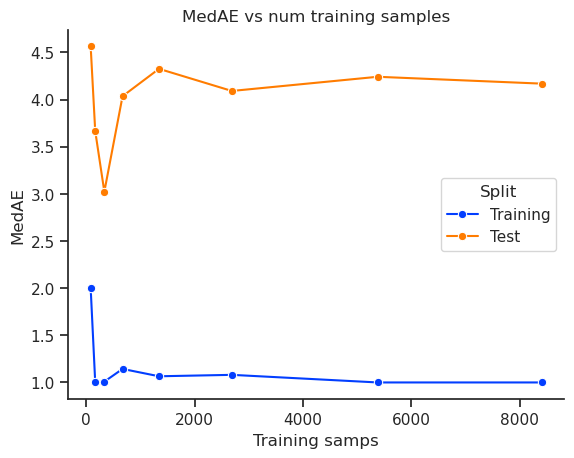

In [30]:
%precision %.2f
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True) # don't use scientific notation

from epsampling.utils import get_chunks
from epsampling.modeling import get_date_chunked_splits, get_performance
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklego.meta import ZeroInflatedRegressor
from sklearn.svm import SVC

random.seed(666)

from tqdm.notebook import tqdm

# # # # # # # # # # # # # # # # # # # #
target_col = 'True_county_inc_deaths'
pred_col = 'Pred'
num_weeks_in_chunk = 4
# # # # # # # # # # # # # # # # # # # #

# ## Random split
# df_train, df_test = train_test_split(df, test_size=0.1, random_state=666, shuffle=True)

## Temporal split
chunks = get_chunks(list(df.Date.unique()), num_weeks_in_chunk)
# idx = random.choice(range(len(chunks)))
idx = 5
df_train, df_test = get_date_chunked_splits(df, chunks, idx)

training_fracs = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.]

list_test_dfs = []
list_train_dfs = []
models = {}

for i,s in tqdm(enumerate(training_fracs), total=len(training_fracs)):
    
    dff_train = df_train.sample(frac=s,random_state=666)
    
    dff_test = df_test.copy()
    dff_train_for_eval = df_train.copy()
        
    feats =  BASE_PRED_COLS + [x for x in df_acs.columns] 
    X_train = dff_train[feats]
    y_train = dff_train[target_col]

    X_test = dff_test[feats]

#     reg = linear_model.LinearRegression().fit(X_train, y_train)
#     reg = linear_model.PoissonRegressor().fit(X_train, y_train)
        
    reg = ZeroInflatedRegressor(
        classifier=SVC(),
        regressor=linear_model.LinearRegression()).fit(X_train, y_train)


    dff_test[f'{pred_col}'] = reg.predict(X_test)
    dff_train_for_eval[f'{pred_col}'] = reg.predict(dff_train_for_eval[feats])

    list_test_dfs.append(dff_test)
    list_train_dfs.append(dff_train_for_eval)
    models[i] = reg
    
    
## GET PERFORMANCE !
from epsampling.modeling import get_metrics_ser

metrics_sers = []
for l,split in [[list_train_dfs,'Training'], [list_test_dfs,'Test']]:
    
    for i,dff in enumerate(l):
        ser = get_metrics_ser(dff, 
                              target_col=target_col, 
                              pred_col=pred_col)
        ser['Training frac'] = training_fracs[i]
        ser['Training samps'] = training_fracs[i] * len(df_train)
        ser['Split'] = split
        ## drop model attr bc only have one
        ser.pop('Model')
        metrics_sers.append(ser)

df_metrics = pd.DataFrame(metrics_sers)

## PLOT !

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1, style='ticks', palette='bright') 
    
sns.lineplot(df_metrics, y='MedAE', x='Training samps', marker='o',hue='Split')
sns.despine()
plt.title(f'MedAE vs num training samples')
plt.show()

In [34]:
list_train_dfs[0]

,Date,State_fips,Fips,Pop,State_pop,Ratio,Proj_state_inc_deaths,True_state_inc_deaths,True_county_cum_deaths,True_county_inc_deaths,...,HU_UIS01D,HU_UIS01A,HU_UIS02,HU_UIS0304,HU_UIS0509,HU_UIS1019,HU_UIS2049,HU_UIS50P,HU_UISOTHER,Pred
0,20200905,37,37001,169185,10367022,0.02,157.00,205.00,46.00,0.00,...,-0.23,0.66,0.16,1.08,1.26,0.81,1.26,0.14,-0.89,12.59
1,20200912,37,37001,169185,10367022,0.02,176.00,160.00,48.00,2.00,...,-0.23,0.66,0.16,1.08,1.26,0.81,1.26,0.14,-0.89,0.00
2,20200919,37,37001,169185,10367022,0.02,157.00,187.00,48.00,0.00,...,-0.23,0.66,0.16,1.08,1.26,0.81,1.26,0.14,-0.89,12.48
3,20200926,37,37001,169185,10367022,0.02,171.00,198.00,54.00,6.00,...,-0.23,0.66,0.16,1.08,1.26,0.81,1.26,0.14,-0.89,12.55
4,20201003,37,37001,169185,10367022,0.02,171.00,189.00,56.00,2.00,...,-0.23,0.66,0.16,1.08,1.26,0.81,1.26,0.14,-0.89,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,20220409,37,37199,18357,10367022,0.00,55.00,43.00,51.00,0.00,...,0.64,-0.63,-0.59,0.81,-0.52,-0.45,-0.31,-0.66,0.02,0.00
8796,20220416,37,37199,18357,10367022,0.00,41.00,76.00,51.00,0.00,...,0.64,-0.63,-0.59,0.81,-0.52,-0.45,-0.31,-0.66,0.02,0.00
8797,20220423,37,37199,18357,10367022,0.00,60.00,29.00,51.00,0.00,...,0.64,-0.63,-0.59,0.81,-0.52,-0.45,-0.31,-0.66,0.02,0.00
8798,20220430,37,37199,18357,10367022,0.00,33.00,42.00,51.00,0.00,...,0.64,-0.63,-0.59,0.81,-0.52,-0.45,-0.31,-0.66,0.02,0.00


In [32]:
display(df_metrics[df_metrics.Split=='Training'],
        df_metrics[df_metrics.Split=='Test'])

,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training frac,Training samps,Split
0,3.60,2.00,-0.75,37.62,1.47,1.50,0.01,84.00,Training
1,2.24,1.00,0.19,17.49,0.92,0.93,0.02,168.00,Training
2,2.34,1.01,0.09,19.52,0.96,0.98,0.04,336.00,Training
3,2.23,1.14,0.26,15.99,0.91,0.93,0.08,672.00,Training
4,2.16,1.07,0.32,14.66,0.88,0.90,0.16,1344.00,Training
5,2.06,1.08,0.36,13.79,0.84,0.86,0.32,2688.00,Training
6,1.99,1.00,0.39,13.06,0.81,0.83,0.64,5376.00,Training
7,1.98,1.00,0.40,12.95,0.81,0.83,1.00,8400.00,Training


,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training frac,Training samps,Split
8,6.53,4.56,-0.16,80.76,1.17,1.18,0.01,84.00,Test
9,4.84,3.66,0.23,53.69,0.87,0.87,0.02,168.00,Test
10,4.87,3.02,0.13,60.76,0.88,0.88,0.04,336.00,Test
11,4.86,4.03,0.28,50.33,0.87,0.87,0.08,672.00,Test
12,5.10,4.33,0.30,49.02,0.92,0.92,0.16,1344.00,Test
13,4.89,4.09,0.31,48.16,0.88,0.88,0.32,2688.00,Test
14,4.88,4.24,0.33,46.88,0.88,0.88,0.64,5376.00,Test
15,4.86,4.17,0.33,46.53,0.88,0.88,1.00,8400.00,Test


In [69]:
display(df_metrics[df_metrics.Split=='Training'],
        df_metrics[df_metrics.Split=='Test'])

,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training frac,Training samps,Split
0,3.60,2.00,-0.75,37.62,1.47,1.50,0.01,84.00,Training
1,2.24,1.00,0.19,17.49,0.92,0.93,0.02,168.00,Training
2,2.34,1.01,0.09,19.52,0.96,0.98,0.04,336.00,Training
3,2.23,1.14,0.26,15.99,0.91,0.93,0.08,672.00,Training
4,2.16,1.07,0.32,14.66,0.88,0.90,0.16,1344.00,Training
5,2.06,1.08,0.36,13.79,0.84,0.86,0.32,2688.00,Training
6,1.99,1.00,0.39,13.06,0.81,0.83,0.64,5376.00,Training
7,1.98,1.00,0.40,12.95,0.81,0.83,1.00,8400.00,Training


,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training frac,Training samps,Split
8,6.53,4.56,-0.16,80.76,1.17,1.18,0.01,84.00,Test
9,4.84,3.66,0.23,53.69,0.87,0.87,0.02,168.00,Test
10,4.87,3.02,0.13,60.76,0.88,0.88,0.04,336.00,Test
11,4.86,4.03,0.28,50.33,0.87,0.87,0.08,672.00,Test
12,5.10,4.33,0.30,49.02,0.92,0.92,0.16,1344.00,Test
13,4.89,4.09,0.31,48.16,0.88,0.88,0.32,2688.00,Test
14,4.88,4.24,0.33,46.88,0.88,0.88,0.64,5376.00,Test
15,4.86,4.17,0.33,46.53,0.88,0.88,1.00,8400.00,Test


### <font color=blue> Train CS splits and look at per-county performance.

In [ ]:
target_col = 'True_county_inc_deaths'

# # # # # # # # # # # # # # # # # # # #
num_weeks_in_chunk = 4
num_runs = 20
alg = 'ZIR'

chunks = get_chunks(list(df.Date.unique()), num_weeks_in_chunk)
idc = random.sample(range(len(chunks)), num_runs)

test_dfs = []
models = {}

for i,idx in tqdm(enumerate(idc), total=len(idc)):
    
    df_train, df_test = get_date_chunked_splits(df, chunks, idx)
    
#     display(df_test.head())
        
    df_test[f'Run'] = i

#     for main_pred_col in ['True_state_inc_deaths_x','Proj_state_inc_deaths_x']:
    for main_pred_col in ['Naive_true_deaths','Naive_proj_deaths']:
        
        feats =  [main_pred_col] + BASE_PRED_COLS + [x for x in df_acs.columns] 
        X_train = df_train[feats]
        y_train = df_train[target_col]

        X_test = df_test[feats]
#         display(X_test[:5])
#         print('hi')

        reg = LinearRegression().fit(X_train, y_train)

        df_test[f'{alg}_({main_pred_col})'] = reg.predict(X_test)
        

    test_dfs.append(df_test)
    models[i] = reg
    
df_res = pd.concat(test_dfs)
df_res.drop(df_acs.columns,axis=1,inplace=True)

print(f'Training set size: {len(X_train)}\nTest set size: {len(X_test)}')